In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('6и9games.csv')

Вывод первых 20 строк датафрейма. Датасет содержит информацию о продаже игр. В датасете представлена информация о названии игры, годе ее выпуска, платформе, жанре, количество продаж в разных странах, оценка критиков, оценка пользователей и общий рейтинг.


In [6]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Оценка данных. Датасет имеет одиннадцать столбцов, 16715 значений, 6 столбец имеет тип float, другие object.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод названий столбцов

In [8]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведение к нижнему регистру

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверка на пропуски

In [11]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
Удаление пропусков

In [12]:
df = df.dropna(subset=['name', 'year_of_release', 
                       'genre','critic_score','user_score','rating'])

In [13]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [ ]:
Проверка на явные дубликаты

In [14]:
df.duplicated().sum()

0

In [ ]:
Проверка на неявные дубликаты

In [22]:
df['user_score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '9.3', '6.2', '4.2', '6', 'tbd', '4.9', '3.7', '4.1',
       '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9',
       '5.2', '3.3', '4.5', '5.1', '3.5', '2.5', '1.9', '2.2', '2', '9.5',
       '4.7', '2.1', '3.6', '1.8', '3.8', '3', '9.6', '2.8', '1.7', '2.7',
       '2.4', '1.5', '1.2', '2.3', '0.5', '0.6', '0.9', '1', '1.4', '1.3',
       '0.7'], dtype=object)

Замена значения в столбце user_score

In [23]:
df.loc[df['user_score']=='tbd', 'user_score'] = '3.4'
df['user_score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7',
       '5.4', '4', '9.3', '6.2', '4.2', '6', '4.9', '3.7', '4.1', '5.8',
       '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2',
       '3.3', '4.5', '5.1', '3.5', '2.5', '1.9', '2.2', '2', '9.5', '4.7',
       '2.1', '3.6', '1.8', '3.8', '3', '9.6', '2.8', '1.7', '2.7', '2.4',
       '1.5', '1.2', '2.3', '0.5', '0.6', '0.9', '1', '1.4', '1.3', '0.7'],
      dtype=object)

Замена типа данных в столбце user_score

In [30]:
df['user_score'] = pd.to_numeric(df['user_score'])

Построение точечной диаграммы
•	Наивысшие оценки пользователей были выставлены в промежутке с 2000 по 2010 год
•	Наивысшие оценки критиков были выставлены в промежутке с 2000 по 2010 год

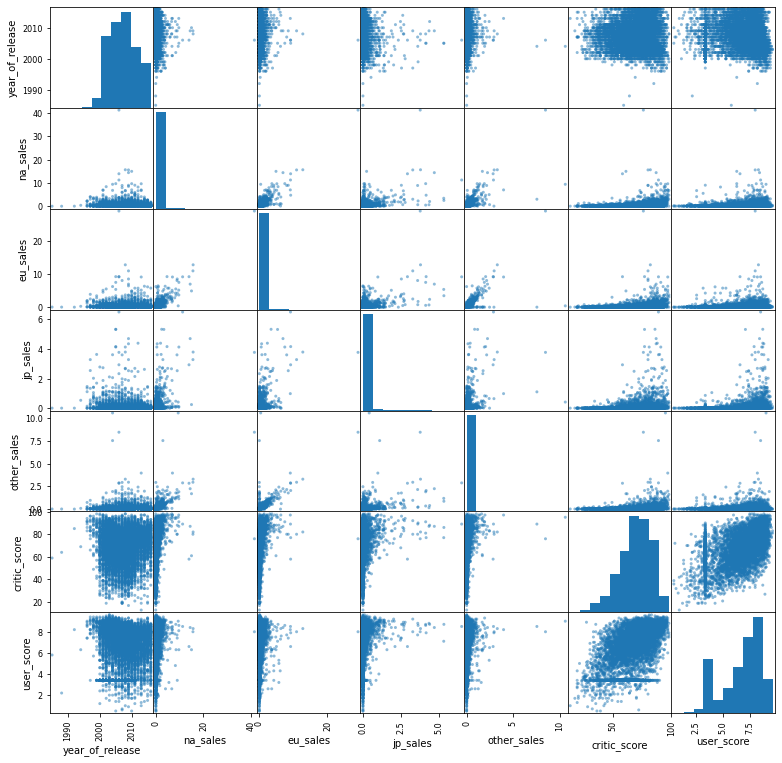

In [29]:
pd.plotting.scatter_matrix(df, figsize=(13, 13))
plt.show()

Вычисление коэффициента корреляции

In [17]:
df['na_sales'].corr(df['critic_score'])

0.2406975638543174

In [18]:
df['year_of_release'].corr(df['eu_sales'])

0.05551415109022465

In [19]:
df['jp_sales'].corr(df['other_sales'])

0.3975050995042245

Построение тепловой карты корреляции
•	Параметр продажи в Европе (eu_sales) очень сильно зависит от продаж в северной америке (na_sales)
•	Параметр оценка пользователей(user_score) очень сильно зависит от года релиза (year_of_release) в отрицательную сторону


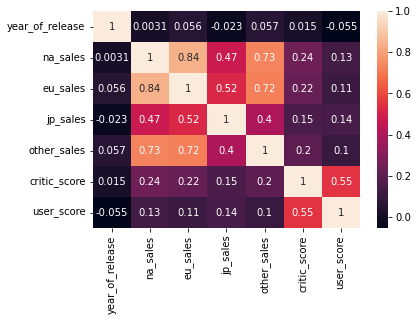

In [26]:
cols = [ 'year_of_release', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score','user_score']
num = {} 
row = [] 
for col1 in cols: 
    row.clear() 
    for col2 in cols:  
        row.append(df[col1].corr(df[col2])) 
    num[col1] = np.array(row) 
 
df1 = pd.DataFrame(num, index=cols, columns=cols) 
sns.heatmap(df1, annot=True) 
plt.show()